In [4]:
# Load necessary libraries
import numpy as np
import pandas as pd



import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

print(os.getcwd())


# Load the data
os.chdir(r'C:\Users\alesi\OneDrive\Desktop\Sepsis Project\the-nexus-of-sepsis')
train_data = pd.read_csv('train.csv')
os.chdir(r'C:\Users\alesi\OneDrive\Desktop\Sepsis Project\the-nexus-of-sepsis')

C:\Users\alesi\OneDrive\Desktop\Sepsis Project\the-nexus-of-sepsis


In [5]:
print(train_data.columns)

Index(['patient', 'time', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


In [6]:
# Check the first few rows of the train data
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088197 entries, 0 to 1088196
Data columns (total 43 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   patient           1088197 non-null  int64  
 1   time              1088197 non-null  int64  
 2   HR                980967 non-null   float64
 3   O2Sat             947133 non-null   float64
 4   Temp              369212 non-null   float64
 5   SBP               931096 non-null   float64
 6   MAP               953029 non-null   float64
 7   DBP               749357 non-null   float64
 8   Resp              921122 non-null   float64
 9   EtCO2             41511 non-null    float64
 10  BaseExcess        58822 non-null    float64
 11  HCO3              45312 non-null    float64
 12  FiO2              90753 non-null    float64
 13  pH                75490 non-null    float64
 14  PaCO2             60609 non-null    float64
 15  SaO2              37520 non-null    float64
 16  

In [7]:
# Assuming `df` is your dataset (DataFrame)
def missing_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percent = df.isnull().mean() * 100
    
    # Create a DataFrame to display the results
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing Percentage': missing_percent
    })
    
    # Filter columns that have missing values
    missing_df = missing_df[missing_df['Missing Percentage'] > 0].sort_values(by='Missing Percentage', ascending=False)
    
    return missing_df

# Assuming you have a DataFrame `train_data`
missing_df = missing_percentage(train_data)
missing_df


,Column,Missing Percentage
Bilirubin_direct,Bilirubin_direct,99.802334
Fibrinogen,Fibrinogen,99.311797
TroponinI,TroponinI,99.043464
Bilirubin_total,Bilirubin_total,98.492828
Alkalinephos,Alkalinephos,98.379521
AST,AST,98.364359
Lactate,Lactate,97.306094
PTT,PTT,97.047961
SaO2,SaO2,96.552095
EtCO2,EtCO2,96.185341


In [8]:
print(train_data.columns)

Index(['patient', 'time', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST',
       'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine',
       'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate',
       'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')


In [1]:
# dropped columns
#print(f"Dropped columns: {dropped_columns_df.columns}")

# current columns in train_data
print("Current columns in train_data:")
print(train_data.columns)

Current columns in train_data:


NameError: name 'train_data' is not defined

In [9]:
# Separate sepsis and non-sepsis patients
sepsis_data = train_data[train_data['SepsisLabel'] == 1.0]
non_sepsis_data = train_data[train_data['SepsisLabel'] == 0.0]

In [10]:
# Check the number of unique patients
print("Number of sepsis patients:", sepsis_data['patient'].nunique())
print("Number of non-sepsis patients:", non_sepsis_data['patient'].nunique())

Number of sepsis patients: 2062
Number of non-sepsis patients: 27922


In [11]:
# Perform forward imputation for each patient while retaining the 'patient' column
sepsis_data = sepsis_data.groupby('patient').apply(lambda group: group.ffill())
non_sepsis_data = non_sepsis_data.groupby('patient').apply(lambda group: group.ffill())

C:\Users\alesi\AppData\Local\Temp\ipykernel_27884\1177119701.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sepsis_data = sepsis_data.groupby('patient').apply(lambda group: group.ffill())
C:\Users\alesi\AppData\Local\Temp\ipykernel_27884\1177119701.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_sepsis_data = non_sepsis_data.groupby('patient').apply(lambda group: group.ffill())


In [12]:
# Reset the index to flatten the DataFrame
sepsis_data.reset_index(drop=True, inplace=True)
non_sepsis_data.reset_index(drop=True, inplace=True)

In [14]:
# Check the number of missing values after forward fill
print("Missing values after forward imputation (Sepsis patients):")
print(sepsis_data.isnull().sum())

Missing values after forward imputation (Sepsis patients):
patient                 0
time                    0
HR                    739
O2Sat                 866
Temp                 4066
SBP                  2073
MAP                   829
DBP                  4979
Resp                 1317
EtCO2               17222
BaseExcess          14487
HCO3                15420
FiO2                10217
pH                  12155
PaCO2               12469
SaO2                15565
AST                 16843
BUN                 12354
Alkalinephos        16856
Calcium             12590
Chloride            14880
Creatinine          12577
Bilirubin_direct    19171
Glucose              9102
Lactate             15353
Magnesium           12935
Phosphate           14340
Potassium           10593
Bilirubin_total     16873
TroponinI           18529
Hct                 11649
Hgb                 12496
PTT                 15959
WBC                 12982
Fibrinogen          18835
Platelets           12948
Age  

In [17]:
# Calculate the percentage of missing values for each column in non_sepsis_data
missing_percentage_sepsis = (sepsis_data.isnull().sum() / len(sepsis_data)) * 100

# Display the missing values as percentages
print(missing_percentage_sepsis)

patient              0.000000
time                 0.000000
HR                   3.766373
O2Sat                4.413638
Temp                20.722695
SBP                 10.565211
MAP                  4.225065
DBP                 25.375873
Resp                 6.712196
EtCO2               87.773304
BaseExcess          73.834157
HCO3                78.589267
FiO2                52.071760
pH                  61.948932
PaCO2               63.549258
SaO2                79.328271
AST                 85.841700
BUN                 62.963152
Alkalinephos        85.907956
Calcium             64.165945
Chloride            75.837113
Creatinine          64.099689
Bilirubin_direct    97.706539
Glucose             46.389073
Lactate             78.247796
Magnesium           65.924265
Phosphate           73.084960
Potassium           53.988074
Bilirubin_total     85.994598
TroponinI           94.434534
Hct                 59.370063
Hgb                 63.686866
PTT                 81.336323
WBC       

In [15]:
print("Missing values after forward imputation (Non-sepsis patients):")
print(non_sepsis_data.isnull().sum())

Missing values after forward imputation (Non-sepsis patients):
patient                   0
time                      0
HR                    24511
O2Sat                 26418
Temp                  78729
SBP                   40384
MAP                   29723
DBP                  220033
Resp                  32977
EtCO2                977784
BaseExcess           731988
HCO3                 608692
FiO2                 605692
pH                   585654
PaCO2                598924
SaO2                 747940
AST                  742314
BUN                  220219
Alkalinephos         745336
Calcium              305297
Chloride             576431
Creatinine           229247
Bilirubin_direct    1018608
Glucose              155716
Lactate              754480
Magnesium            300228
Phosphate            460017
Potassium            195120
Bilirubin_total      746194
TroponinI            908649
Hct                  208470
Hgb                  225424
PTT                  593278
WBC          

In [16]:
# Calculate the percentage of missing values for each column in non_sepsis_data
missing_percentage_non_sepsis = (non_sepsis_data.isnull().sum() / len(non_sepsis_data)) * 100

# Display the missing values as percentages
print(missing_percentage_non_sepsis)

patient              0.000000
time                 0.000000
HR                   2.293802
O2Sat                2.472264
Temp                 7.367663
SBP                  3.779239
MAP                  2.781555
DBP                 20.591255
Resp                 3.086073
EtCO2               91.503544
BaseExcess          68.501322
HCO3                56.962965
FiO2                56.682217
pH                  54.807009
PaCO2               56.048850
SaO2                69.994151
AST                 69.467656
BUN                 20.608661
Alkalinephos        69.750462
Calcium             28.570479
Chloride            53.943897
Creatinine          21.453525
Bilirubin_direct    95.323959
Glucose             14.572304
Lactate             70.606181
Magnesium           28.096109
Phosphate           43.049575
Potassium           18.259832
Bilirubin_total     69.830756
TroponinI           85.033713
Hct                 19.509159
Hgb                 21.095758
PTT                 55.520483
WBC       

In [19]:
total_missing_sepsis= missing_percentage_sepsis + missing_percentage_non_sepsis
print(total_missing_sepsis)

patient               0.000000
time                  0.000000
HR                    6.060175
O2Sat                 6.885903
Temp                 28.090358
SBP                  14.344449
MAP                   7.006620
DBP                  45.967127
Resp                  9.798269
EtCO2               179.276849
BaseExcess          142.335479
HCO3                135.552231
FiO2                108.753977
pH                  116.755942
PaCO2               119.598109
SaO2                149.322422
AST                 155.309356
BUN                  83.571813
Alkalinephos        155.658418
Calcium              92.736424
Chloride            129.781011
Creatinine           85.553214
Bilirubin_direct    193.030498
Glucose              60.961377
Lactate             148.853977
Magnesium            94.020374
Phosphate           116.134535
Potassium            72.247906
Bilirubin_total     155.825354
TroponinI           179.468248
Hct                  78.879222
Hgb                  84.782624
PTT     

AttributeError: module 'matplotlib.pyplot' has no attribute 'xla'

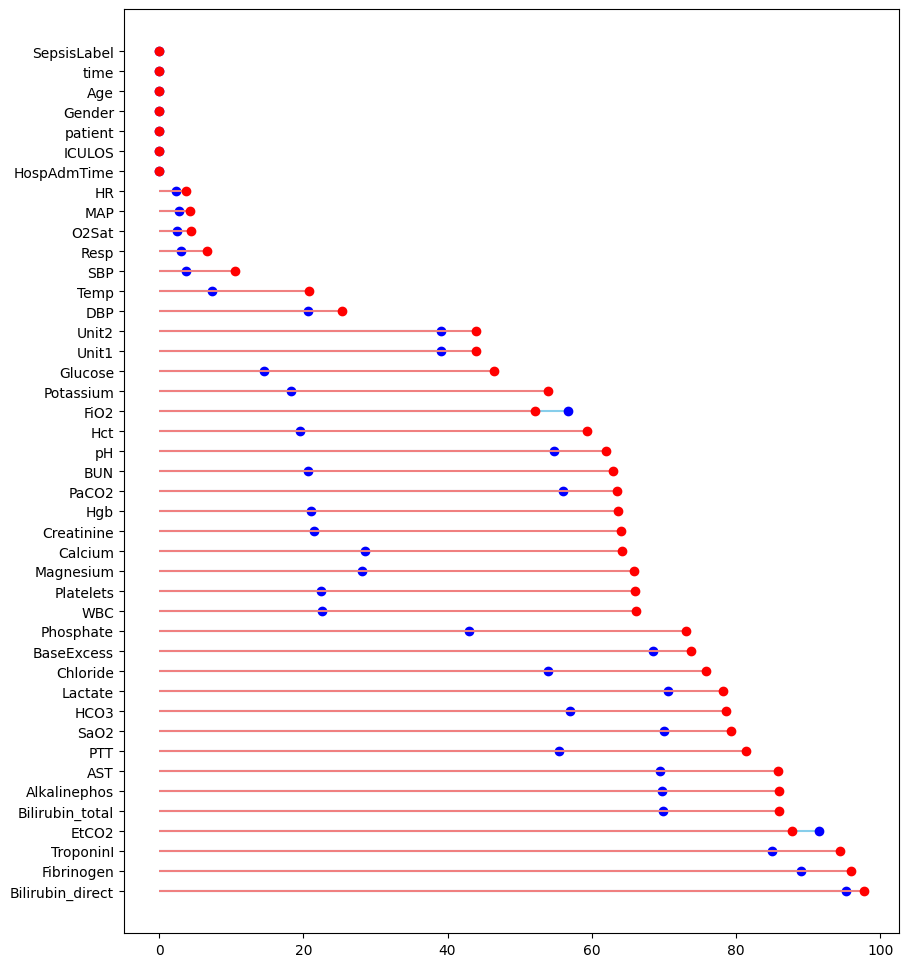

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentage of missing values for each dataset
total_rows_non_sepsis = len(non_sepsis_data)
total_rows_sepsis = len(sepsis_data)

missing_percentage_non_sepsis = (non_sepsis_data.isnull().sum() / total_rows_non_sepsis) * 100
missing_percentage_sepsis = (sepsis_data.isnull().sum() / total_rows_sepsis) * 100

# Create a DataFrame to hold the missing values percentages for both datasets
missing_comparison_df = pd.DataFrame({
    'Feature': non_sepsis_data.columns,
    'Non_Sepsis_Missing_Percentage': missing_percentage_non_sepsis.values,
    'Sepsis_Missing_Percentage': missing_percentage_sepsis.values
})

# Sort by the feature with the most missing values in either dataset for better visual comparison
missing_comparison_df['Max_Missing'] = missing_comparison_df[['Non_Sepsis_Missing_Percentage', 'Sepsis_Missing_Percentage']].max(axis=1)
missing_comparison_df = missing_comparison_df.sort_values(by='Max_Missing', ascending=False)

# Plot the Cleveland dot plot
plt.figure(figsize=(10, 12))
plt.hlines(y=missing_comparison_df['Feature'], xmin=0, xmax=missing_comparison_df['Non_Sepsis_Missing_Percentage'], color='skyblue', label='Non-Sepsis')
plt.plot(missing_comparison_df['Non_Sepsis_Missing_Percentage'], missing_comparison_df['Feature'], 'o', color='blue')
plt.hlines(y=missing_comparison_df['Feature'], xmin=0, xmax=missing_comparison_df['Sepsis_Missing_Percentage'], color='lightcoral', label='Sepsis')
plt.plot(missing_comparison_df['Sepsis_Missing_Percentage'], missing_comparison_df['Feature'], 'o', color='red')

# Add labels and title
plt.xla


In [20]:
total_missing_date<- non_sepsis_data.insull().sum()

NameError: name 'total_missing_date' is not defined

In [ ]:
# Perform global imputation for any remaining missing values using the mean
sepsis_data.fillna(sepsis_data.mean(), inplace=True)
non_sepsis_data.fillna(non_sepsis_data.mean(), inplace=True)

In [112]:
# Combine the cleaned sepsis and non-sepsis datasets
cleaned_train_data = pd.concat([sepsis_data, non_sepsis_data], ignore_index=True)

# Check the shape and the first few rows of the cleaned training dataset
print("Shape of cleaned training dataset:", cleaned_train_data.shape)

Shape of cleaned training dataset: (1088196, 35)


In [94]:
# Display the combined DataFrame
print("Combined cleaned training dataset:")
print(cleaned_train_data)

Combined cleaned training dataset:
         patient  time    HR  O2Sat       Temp    SBP   MAP   DBP  Resp  \
0              6    69  89.0  100.0  37.178888  127.0  86.0  66.0  22.0   
1              6    70  87.0  100.0  37.178888  119.0  80.0  60.0  22.0   
2              6    71  92.0  100.0  37.390000  121.0  80.0  61.0  22.5   
3              6    72  95.0  100.0  37.390000  115.0  74.0  57.0  17.0   
4              6    73  95.5  100.0  37.390000  137.0  89.5  66.0  24.5   
...          ...   ...   ...    ...        ...    ...   ...   ...   ...   
1088191    28235    46  84.0   93.0  37.170000  163.0  94.0  64.0  21.0   
1088192    28235    47  87.0   95.0  37.170000  157.0  96.0  66.0  18.0   
1088193    28235    48  90.0   93.0  37.170000  143.0  86.0  61.0  23.0   
1088194    28235    49  86.0   94.0  37.170000  155.0  91.0  62.0  23.0   
1088195    28235    50  87.0   94.0  37.170000  157.0  92.0  63.0  25.0   

             EtCO2  ...        PTT        WBC   Platelets    Age

In [96]:
# Save the cleaned training dataset to a CSV file
cleaned_train_data.to_csv('cleaned_train_data.csv', index=False)

# Display a message confirming that the file was saved
print("cleaned_train_data.csv has been saved.")


cleaned_train_data.csv has been saved.


In [97]:
# Display data types in a more readable format
data_types_df = cleaned_train_data.dtypes.reset_index()
data_types_df.columns = ['Column', 'Data Type']
print(data_types_df)

         Column Data Type
0       patient     int64
1          time     int64
2            HR   float64
3         O2Sat   float64
4          Temp   float64
5           SBP   float64
6           MAP   float64
7           DBP   float64
8          Resp   float64
9         EtCO2   float64
10         FiO2   float64
11           pH   float64
12        PaCO2   float64
13         SaO2   float64
14          BUN   float64
15      Calcium   float64
16     Chloride   float64
17   Creatinine   float64
18      Glucose   float64
19      Lactate   float64
20    Magnesium   float64
21    Phosphate   float64
22    Potassium   float64
23          Hct   float64
24          Hgb   float64
25          PTT   float64
26          WBC   float64
27    Platelets   float64
28          Age   float64
29       Gender   float64
30        Unit1   float64
31        Unit2   float64
32  HospAdmTime   float64
33       ICULOS   float64
34  SepsisLabel   float64


In [98]:
cleaned_train_data['Gender'] = cleaned_train_data['Gender'].astype('category')

# Convert SepsisLabel to int if it only contains 0 and 1
cleaned_train_data['SepsisLabel'] = cleaned_train_data['SepsisLabel'].astype(int)

In [99]:
# Check the number of missing values after forward fill
print("Missing values after cleaning:")
print(cleaned_train_data.isnull().sum())

Missing values after cleaning:
patient        0
time           0
HR             0
O2Sat          0
Temp           0
SBP            0
MAP            0
DBP            0
Resp           0
EtCO2          0
FiO2           0
pH             0
PaCO2          0
SaO2           0
BUN            0
Calcium        0
Chloride       0
Creatinine     0
Glucose        0
Lactate        0
Magnesium      0
Phosphate      0
Potassium      0
Hct            0
Hgb            0
PTT            0
WBC            0
Platelets      0
Age            0
Gender         0
Unit1          0
Unit2          0
HospAdmTime    0
ICULOS         0
SepsisLabel    0
dtype: int64


In [100]:
# Check again
print(data_types_df)

         Column Data Type
0       patient     int64
1          time     int64
2            HR   float64
3         O2Sat   float64
4          Temp   float64
5           SBP   float64
6           MAP   float64
7           DBP   float64
8          Resp   float64
9         EtCO2   float64
10         FiO2   float64
11           pH   float64
12        PaCO2   float64
13         SaO2   float64
14          BUN   float64
15      Calcium   float64
16     Chloride   float64
17   Creatinine   float64
18      Glucose   float64
19      Lactate   float64
20    Magnesium   float64
21    Phosphate   float64
22    Potassium   float64
23          Hct   float64
24          Hgb   float64
25          PTT   float64
26          WBC   float64
27    Platelets   float64
28          Age   float64
29       Gender   float64
30        Unit1   float64
31        Unit2   float64
32  HospAdmTime   float64
33       ICULOS   float64
34  SepsisLabel   float64


In [101]:
cleaned_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088196 entries, 0 to 1088195
Data columns (total 35 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   patient      1088196 non-null  int64   
 1   time         1088196 non-null  int64   
 2   HR           1088196 non-null  float64 
 3   O2Sat        1088196 non-null  float64 
 4   Temp         1088196 non-null  float64 
 5   SBP          1088196 non-null  float64 
 6   MAP          1088196 non-null  float64 
 7   DBP          1088196 non-null  float64 
 8   Resp         1088196 non-null  float64 
 9   EtCO2        1088196 non-null  float64 
 10  FiO2         1088196 non-null  float64 
 11  pH           1088196 non-null  float64 
 12  PaCO2        1088196 non-null  float64 
 13  SaO2         1088196 non-null  float64 
 14  BUN          1088196 non-null  float64 
 15  Calcium      1088196 non-null  float64 
 16  Chloride     1088196 non-null  float64 
 17  Creatinine   1088196 non-nu

In [102]:
import statsmodels.api as sm  # Use 'sm' as the alias

y = cleaned_train_data["SepsisLabel"]
X = cleaned_train_data.drop(columns=['SepsisLabel'])

# Add a constant (for the intercept) to the features
X = sm.add_constant(X)

# Fit the model using statsmodels OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            SepsisLabel   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1554.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:39:58   Log-Likelihood:             6.7580e+05
No. Observations:             1088196   AIC:                        -1.352e+06
Df Residuals:                 1088162   BIC:                        -1.351e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1943      0.018    -10.698      

In [103]:
from sklearn.metrics import confusion_matrix

# Step 5: Make predictions (get predicted probabilities)
y_pred_prob = model.predict(X)

# Step 6: Convert probabilities to binary predictions (threshold 0.5)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Step 7: Create the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1068575       0]
 [  19621       0]]


In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 2: Initialize the Random Forest model (without balancing)
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Fit the Random Forest model on the entire dataset
rf_model.fit(X, y)

# Step 4: Make predictions on the same dataset (since no train-test split)
y_pred = rf_model.predict(X)

# Step 5: Evaluate the model using a confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Negative', 'Positive']))


Confusion Matrix:
[[1068575       0]
 [      0   19621]]

Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00   1068575
    Positive       1.00      1.00      1.00     19621

    accuracy                           1.00   1088196
   macro avg       1.00      1.00      1.00   1088196
weighted avg       1.00      1.00      1.00   1088196



In [105]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Initialize the SVM model
svm_model = SVC(random_state=42)

# Step 2: Fit the SVM model on the entire dataset
svm_model.fit(X, y)

# Step 3: Make predictions on the same dataset (since no train-test split)
y_pred = svm_model.predict(X)

# Step 4: Evaluate the model using a confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Negative', 'Positive']))

Confusion Matrix:
[[1068575       0]
 [  19621       0]]

Classification Report:


C:\Users\alesi\anaconda3\envs\software_tools\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99   1068575
    Positive       0.00      0.00      0.00     19621

    accuracy                           0.98   1088196
   macro avg       0.49      0.50      0.50   1088196
weighted avg       0.96      0.98      0.97   1088196



C:\Users\alesi\anaconda3\envs\software_tools\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\alesi\anaconda3\envs\software_tools\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


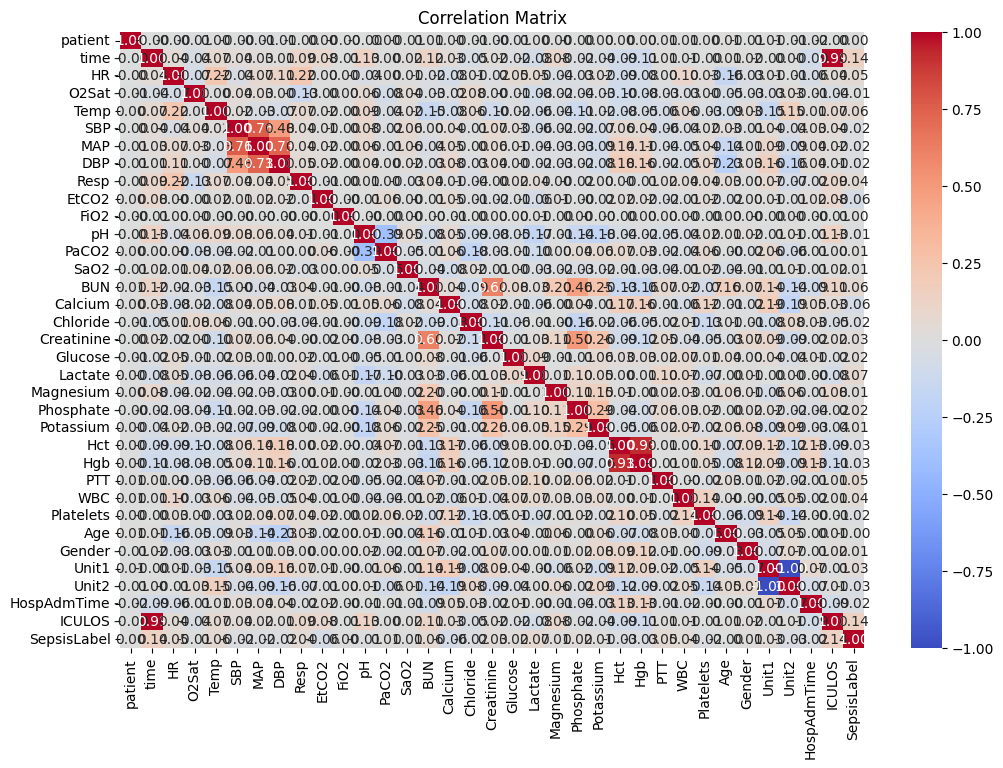

              patient      time        HR     O2Sat      Temp       SBP  \
patient      1.000000 -0.000251 -0.004200 -0.010507  0.000413 -0.001436   
time        -0.000251  1.000000  0.042972 -0.042625  0.066667  0.038660   
HR          -0.004200  0.042972  1.000000 -0.072484  0.224287 -0.035804   
O2Sat       -0.010507 -0.042625 -0.072484  1.000000  0.000109  0.038600   
Temp         0.000413  0.066667  0.224287  0.000109  1.000000  0.019915   
SBP         -0.001436  0.038660 -0.035804  0.038600  0.019915  1.000000   
MAP         -0.011506  0.026213  0.066753  0.033810 -0.034038  0.758457   
DBP         -0.011076  0.014754  0.112433  0.004666 -0.067665  0.478588   
Resp        -0.004123  0.090176  0.219088 -0.131437  0.074633  0.039016   
EtCO2        0.000271  0.078206  0.004489 -0.003225  0.015243  0.009701   
FiO2        -0.002601 -0.006218  0.001975  0.000741 -0.002097 -0.003169   
pH          -0.004316  0.130914 -0.036024  0.059200  0.094465  0.076415   
PaCO2        0.002291  0.

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = cleaned_train_data.corr()

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Display the correlation matrix as a readable table
print(correlation_matrix)

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load your cleaned data
# cleaned_train_data = pd.read_csv('path_to_your_data.csv')  # Uncomment this if needed

# Separate features and target variable
X = cleaned_train_data.drop(columns=['SepsisLabel'])  # Use 'SepsisLabel' as the target
y = cleaned_train_data['SepsisLabel']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


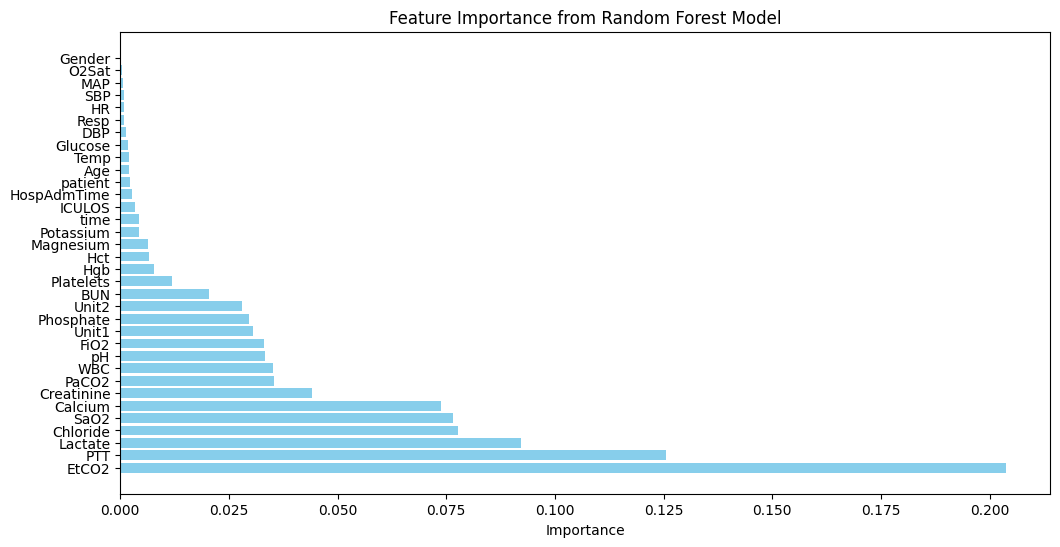

In [108]:
# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame(importances, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.show()

# SMOTE

In [114]:
X = df.drop(columns = ['SepsisLabel'])
y = df['SepsisLabel']

help(train_test_split)
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size = 0.5, stratify=y)

print("\n \n Training set:", X_train, y_train)
print("\n \n Test set:", X_test, y_test)

NameError: name 'df' is not defined

In [115]:
print("\n", X_train.shape)
print("\n", y_train.shape)
print("\n", X_test.shape)
print("\n", y_test.shape)

print(y_train.describe().T)
print(y_test.describe().T)

print(X_train.iloc[:, 0:4].describe())
print(X_test.iloc[:, 0:4].describe())


 (870556, 34)

 (870556,)

 (217640, 34)

 (217640,)
count    870556.000000
mean          0.018023
std           0.133034
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SepsisLabel, dtype: float64
count    217640.000000
mean          0.018062
std           0.133176
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: SepsisLabel, dtype: float64
             patient           time             HR          O2Sat
count  870556.000000  870556.000000  870556.000000  870556.000000
mean    14110.898830      26.659918      84.381469      97.144277
std      8154.054296      29.520728      17.188539       3.073822
min         1.000000       1.000000      20.000000      20.000000
25%      7043.000000      10.000000      72.000000      96.000000
50%     14104.000000      20.000000      84.000000      98.000000
75%     21183.000000      34.000000      95.0000

C:\Users\alesi\anaconda3\envs\software_tools\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction Score: 0.9815612938798015
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    213709
         1.0       0.10      0.00      0.00      3931

    accuracy                           0.98    217640
   macro avg       0.54      0.50      0.50    217640
weighted avg       0.97      0.98      0.97    217640



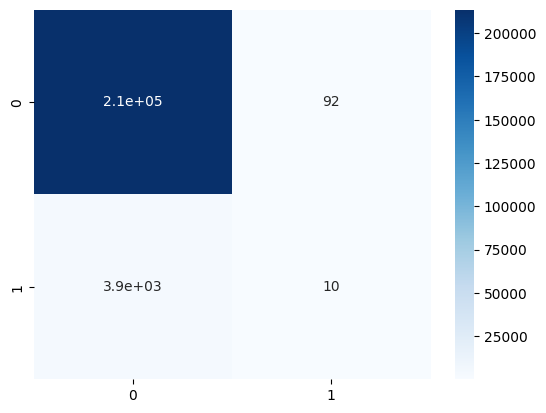

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined
First_model = LogisticRegression()
First_model.fit(X_train, y_train)
Deter = First_model.predict(X_test)

# Accuracy score and classification report
print("Prediction Score:", accuracy_score(y_test, Deter))
print(classification_report(y_test, Deter))

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, Deter)
sns.heatmap(conf_matrix, annot=True, fmt='.2g', cmap='Blues')

# To display the plot
plt.show()


In [123]:
# Import SMOTE for sampling
from imblearn.over_sampling import SMOTE

# Get help documentation for SMOTE
help(SMOTE)


Help on class SMOTE in module imblearn.over_sampling._smote.base:

class SMOTE(BaseSMOTE)
 |  SMOTE(*, sampling_strategy='auto', random_state=None, k_neighbors=5, n_jobs=None)
 |
 |  Class to perform over-sampling using SMOTE.
 |
 |  This object is an implementation of SMOTE - Synthetic Minority
 |  Over-sampling Technique as presented in [1]_.
 |
 |  Read more in the :ref:`User Guide <smote_adasyn>`.
 |
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, default='auto'
 |      Sampling information to resample the data set.
 |
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |        number of samples in the minority class after resampling and
 |        :math:`N_{M}` is the number of samples in the 

In [124]:
sm = SMOTE(sampling_strategy=0.3, k_neighbors=5, random_state=100) 
X_train_syn, y_train_syn = sm.fit_resample(X_train, y_train)

In [125]:
print(X_train.iloc[:, 0:4].describe())
print(X_train_syn.iloc[:, 0:4].describe())

print(y_train.describe())
print(y_train_syn.describe())

             patient           time             HR          O2Sat
count  870556.000000  870556.000000  870556.000000  870556.000000
mean    14110.898830      26.659918      84.381469      97.144277
std      8154.054296      29.520728      17.188539       3.073822
min         1.000000       1.000000      20.000000      20.000000
25%      7043.000000      10.000000      72.000000      96.000000
50%     14104.000000      20.000000      84.000000      98.000000
75%     21183.000000      34.000000      95.000000      99.000000
max     28235.000000     424.000000     211.000000     100.000000
            patient          time            HR         O2Sat
count  1.111325e+06  1.111325e+06  1.111325e+06  1.111325e+06
mean   1.411475e+04  3.289655e+01  8.578577e+01  9.711146e+01
std    8.160827e+03  4.018730e+01  1.762052e+01  3.038399e+00
min    1.000000e+00  1.000000e+00  2.000000e+01  2.000000e+01
25%    7.027000e+03  1.000000e+01  7.302247e+01  9.600000e+01
50%    1.414500e+04  2.200000e+01 

C:\Users\alesi\anaconda3\envs\software_tools\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction_Score 0.9389680205844514
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97    213709
         1.0       0.09      0.25      0.13      3931

    accuracy                           0.94    217640
   macro avg       0.54      0.60      0.55    217640
weighted avg       0.97      0.94      0.95    217640



<Axes: >

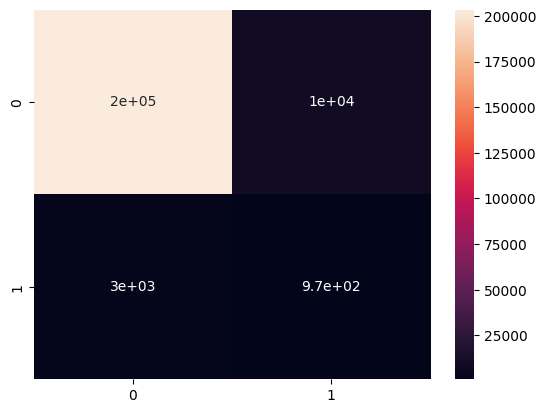

In [126]:
Second_model = LogisticRegression()
Second_model.fit(X_train_syn,y_train_syn)
Deter2 = Second_model.predict(X_test)

print("Prediction_Score", accuracy_score(y_test, Deter2))
print(classification_report(y_test,Deter2))

sns.heatmap(confusion_matrix(y_test,Deter2), annot = True,fmt ='.2g')

# Anamoly Detection

In [128]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load your dataset
data= pd.read_csv('cleaned_train_data.csv')

# Select features (ensure only numeric features are selected)
# Remove non-numeric columns or encode them as needed
numeric_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 
                    'EtCO2', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'BUN', 'Calcium', 
                    'Chloride', 'Creatinine', 'Glucose', 'Lactate', 'Magnesium', 
                    'Phosphate', 'Potassium', 'Hct', 'Hgb', 'PTT', 'WBC', 
                    'Platelets', 'Age', 'HospAdmTime', 'ICULOS']

# Drop rows with missing values (optional, or you can fill missing values)
X = data[numeric_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
model.fit(X_scaled)

# Predict anomalies (-1 indicates an anomaly, 1 indicates normal)
data['anomaly'] = model.predict(X_scaled)

# Count the number of anomalies
anomaly_count = data['anomaly'].value_counts()
print(f"Number of anomalies: {anomaly_count.get(-1, 0)}")

# Separate normal data and anomalies
normal_data = data[data['anomaly'] == 1]
anomalies = data[data['anomaly'] == -1]

# Display a few anomalies
print(anomalies.head())

Number of anomalies: 54410
    patient  time     HR  O2Sat   Temp    SBP    MAP         DBP  Resp  \
47       62   111  102.0   91.0  37.67   55.0   47.0   33.000000  20.0   
72      106     4   78.0  100.0  37.00  195.0  141.0   62.137356  19.0   
73      106     5   75.0  100.0  37.00  193.0  139.0   62.137356  19.0   
74      106     6   69.0  100.0  37.00  187.0  127.0  110.000000  20.0   
75      106     7   59.0  100.0  37.00  114.5   84.0   78.000000  16.0   

     EtCO2  ...        WBC   Platelets    Age  Gender     Unit1     Unit2  \
47  32.401  ...  13.167195  190.965533  37.05     0.0  1.000000  0.000000   
72  32.401  ...  13.900000   84.000000  56.12     1.0  0.586822  0.413178   
73  32.401  ...  13.900000   84.000000  56.12     1.0  0.586822  0.413178   
74  32.401  ...  13.900000   84.000000  56.12     1.0  0.586822  0.413178   
75  32.401  ...  13.900000   84.000000  56.12     1.0  0.586822  0.413178   

    HospAdmTime  ICULOS  SepsisLabel  anomaly  
47      -304.97  

In [131]:
from sklearn.metrics import classification_report
import numpy as np

# Example true labels and predictions
y_true = np.array([1, 0, 1, 1, 0, 1, 0])  # True labels
predictions = np.array([1, 0, 0, 1, 0, 1, 1])  # Predicted labels

# Ensure that both arrays are of the same length
if len(y_true) == len(predictions):
    print(classification_report(y_true, predictions))
else:
    print("Error: Length of y_true and predictions do not match.")



              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.75      0.75      0.75         4

    accuracy                           0.71         7
   macro avg       0.71      0.71      0.71         7
weighted avg       0.71      0.71      0.71         7



# Feature Engineering 

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Sample dataset creation (assuming the columns provided)
data = pd.DataFrame({
    'HR': [60, 72, 85, 90, 75],
    'O2Sat': [98, 95, 92, 89, 100],
    'Temp': [98.6, 99.5, 100.1, 98.7, 98.0],
    'SBP': [120, 135, 150, 145, 130],
    'MAP': [80, 90, 100, 95, 85],
    'DBP': [70, 85, 90, 88, 80],
    'Resp': [16, 20, 25, 18, 22],
    'EtCO2': [38, 40, 35, 34, 36],
    'FiO2': [0.21, 0.3, 0.4, 0.35, 0.21],
    'pH': [7.4, 7.35, 7.3, 7.45, 7.5],
    'PaCO2': [40, 42, 44, 38, 39],
    'SaO2': [95, 92, 90, 89, 96],
    'BUN': [15, 20, 25, 10, 18],
    'Calcium': [9.0, 9.5, 8.5, 10.0, 9.2],
    'Chloride': [100, 105, 110, 95, 102],
    'Creatinine': [1.0, 1.2, 1.5, 1.0, 0.9],
    'Glucose': [90, 85, 150, 120, 110],
    'Lactate': [1.0, 1.5, 2.0, 1.0, 0.5],
    'Magnesium': [2.0, 1.8, 2.2, 2.1, 1.9],
    'Phosphate': [3.0, 3.5, 2.5, 3.0, 2.8],
    'Potassium': [4.0, 4.5, 5.5, 4.1, 3.9],
    'Hct': [45, 46, 40, 44, 42],
    'Hgb': [15, 15.5, 13.5, 14, 14.5],
    'PTT': [30, 35, 40, 32, 31],
    'WBC': [6.5, 7.0, 8.0, 6.0, 5.5],
    'Platelets': [250, 300, 320, 270, 280],
    'Age': [25, 40, 60, 35, 50],
    'HospAdmTime': pd.date_range(start='2023-01-01', periods=5, freq='D'),
    'ICULOS': [2, 3, 5, 1, 4]
})

# Example Feature Engineering

# 1. Create a new feature: High Blood Pressure flag
data['High_BP'] = np.where((data['SBP'] > 140) | (data['DBP'] > 90), 1, 0)

# 2. Categorize O2Sat levels
data['O2Sat_Category'] = pd.cut(data['O2Sat'], bins=[0, 90, 95, 100], labels=['Low', 'Normal', 'High'])

# 3. Create BMI if Weight and Height were available
# For this example, assuming weights and heights for each patient
# data['BMI'] = data['Weight'] / (data['Height'] ** 2)  # Uncomment if those columns exist

# 4. Create interaction features
data['HR_Temp_Interaction'] = data['HR'] * data['Temp']

# 5. Extract time-based features (like admission day of the week)
data['Admission_Day'] = data['HospAdmTime'].dt.dayofweek

# 6. Handle missing values (example: filling with median)
data['BUN'].fillna(data['BUN'].median(), inplace=True)

# 7. Normalize numerical features
scaler = StandardScaler()
data[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'FiO2', 
      'pH', 'PaCO2', 'SaO2', 'BUN', 'Calcium', 'Chloride', 'Creatinine', 
      'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Hct', 
      'Hgb', 'PTT', 'WBC', 'Platelets', 'Age', 'ICULOS']] = scaler.fit_transform(
    data[['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2', 'FiO2', 
          'pH', 'PaCO2', 'SaO2', 'BUN', 'Calcium', 'Chloride', 'Creatinine', 
          'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Hct', 
          'Hgb', 'PTT', 'WBC', 'Platelets', 'Age', 'ICULOS']]
)

# Display the modified DataFrame with engineered features
print("\nModified Data with Engineered Features:\n", data)



Modified Data with Engineered Features:
          HR     O2Sat      Temp       SBP       MAP       DBP      Resp  \
0 -1.564817  0.806068 -0.516350 -1.498537 -1.414214 -1.763661 -1.344387   
1 -0.419829  0.050379  0.706584 -0.093659  0.000000  0.335936 -0.064018   
2  0.820575 -0.705310  1.521874  1.311220  1.414214  1.035801  1.536443   
3  1.297653 -1.460999 -0.380468  0.842927  0.707107  0.755855 -0.704203   
4 -0.133582  1.309861 -1.331640 -0.561951 -0.707107 -0.363930  0.576166   

      EtCO2      FiO2        pH  ...       PTT       WBC  Platelets       Age  \
0  0.649934 -1.112217  0.000000  ... -0.996928 -0.116248  -1.406930 -1.406930   
1  1.578410  0.079444 -0.707107  ...  0.387694  0.464991   0.662085 -0.165521   
2 -0.742781  1.403512 -1.414214  ...  1.772316  1.627467   1.489691  1.489691   
3 -1.207020  0.741478  0.707107  ... -0.443079 -0.697486  -0.579324 -0.579324   
4 -0.278543 -1.112217  1.414214  ... -0.720003 -1.278724  -0.165521  0.662085   

   HospAdmTime    IC

C:\Users\alesi\AppData\Local\Temp\ipykernel_29560\118375108.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BUN'].fillna(data['BUN'].median(), inplace=True)


# Feature Selection

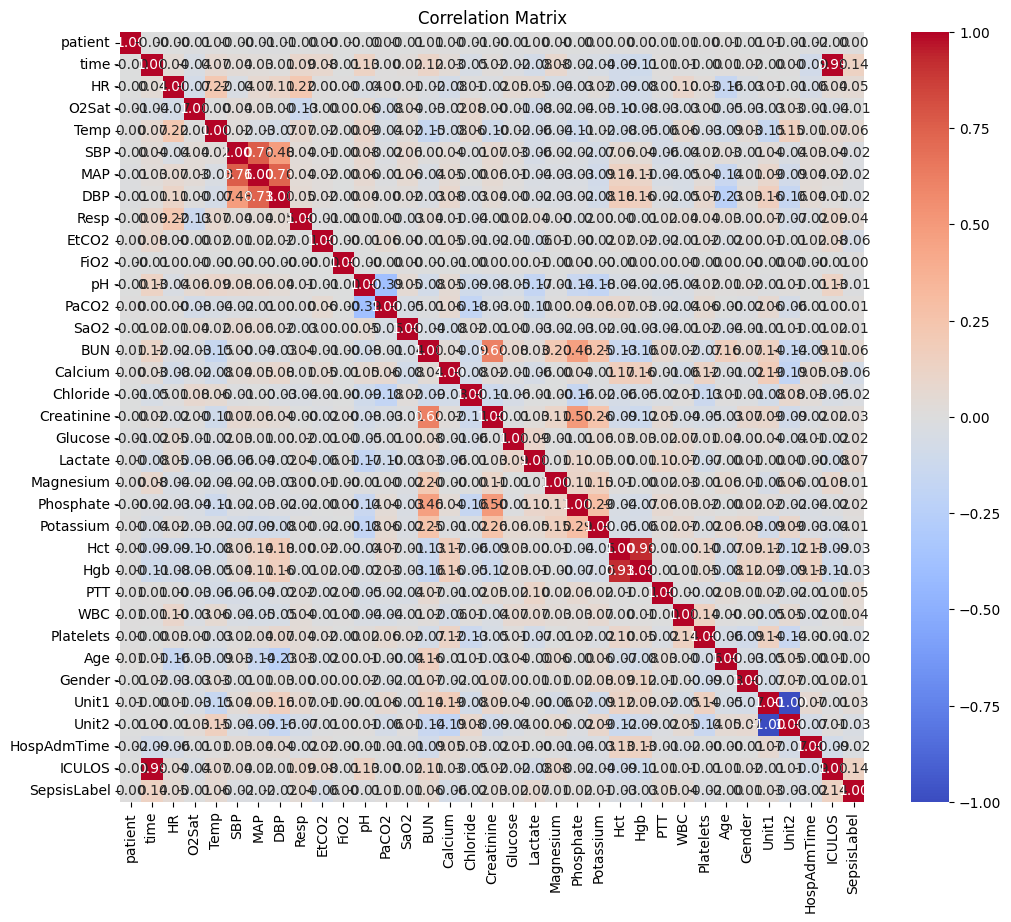

Features with high variance: Index(['patient', 'time', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'EtCO2', 'FiO2', 'PaCO2', 'SaO2', 'BUN', 'Calcium', 'Chloride',
       'Creatinine', 'Glucose', 'Lactate', 'Phosphate', 'Potassium', 'Hct',
       'Hgb', 'PTT', 'WBC', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS'],
      dtype='object')
Selected Features by RFE: Index(['EtCO2', 'FiO2', 'PaCO2', 'SaO2', 'Calcium', 'Chloride', 'Creatinine',
       'Lactate', 'PTT', 'Unit1'],
      dtype='object')
Feature Importances from Random Forest:
        Feature  Importance
9         EtCO2    0.247729
25          PTT    0.148140
19      Lactate    0.101327
16     Chloride    0.074209
15      Calcium    0.051697
13         SaO2    0.050459
21    Phosphate    0.040781
30        Unit1    0.036754
12        PaCO2    0.035797
26          WBC    0.033674
17   Creatinine    0.031453
14          BUN    0.026777
10         FiO2    0.022365
31        Unit2    0.0

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('cleaned_train_data.csv')

# Assuming 'SepsisLabel' is your target variable
X = data.drop(['SepsisLabel'], axis=1)
y = data['SepsisLabel']

# 1. Filter Method: Correlation Matrix
corr = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 2. Filter Method: Variance Threshold
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)  # Adjust the threshold as necessary
X_high_variance = selector.fit_transform(X)
features_high_variance = X.columns[selector.get_support()]
print("Features with high variance:", features_high_variance)

# 3. Wrapper Method: Recursive Feature Elimination (RFE)
model_rfe = RandomForestClassifier(random_state=42)
rfe = RFE(model_rfe, n_features_to_select=10)  # Change 10 to the number of features you want
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features_rfe)

# 4. Embedded Method: Feature Importances from Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X, y)
importances = model_rf.feature_importances_

# Create a DataFrame to hold feature names and their importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature Importances from Random Forest:")
print(feature_importances)

# 5. Regularization Method: Lasso Regression
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)

# Get the coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
selected_features_lasso = coefficients[coefficients['Coefficient'] != 0]
print("Selected Features by Lasso Regression:", selected_features_lasso)

# 6. Univariate Feature Selection: SelectKBest
kbest = SelectKBest(score_func=f_classif, k=10)  # Change 10 to the number of top features you want
X_kbest = kbest.fit_transform(X, y)
selected_features_kbest = X.columns[kbest.get_support()]
print("Selected Features by SelectKBest:", selected_features_kbest)
